Aim: visualise the traffic patterns.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [2]:
print(os.listdir("./data"))

['dot_traffic_2015.txt.gz', 'dot_traffic_stations_2015.txt.gz']


In [7]:
#Importing data
traffic_2015 = pd.read_csv("./data/dot_traffic_2015.txt.gz")
traffic_2015_stations = pd.read_csv("./data/dot_traffic_stations_2015.txt.gz")

## Data Exploration

Have an idea of how the data looks like and what information we have

In [10]:
traffic_2015.columns

Index(['date', 'day_of_data', 'day_of_week', 'direction_of_travel',
       'direction_of_travel_name', 'fips_state_code',
       'functional_classification', 'functional_classification_name',
       'lane_of_travel', 'month_of_data', 'record_type', 'restrictions',
       'station_id', 'traffic_volume_counted_after_0000_to_0100',
       'traffic_volume_counted_after_0100_to_0200',
       'traffic_volume_counted_after_0200_to_0300',
       'traffic_volume_counted_after_0300_to_0400',
       'traffic_volume_counted_after_0400_to_0500',
       'traffic_volume_counted_after_0500_to_0600',
       'traffic_volume_counted_after_0600_to_0700',
       'traffic_volume_counted_after_0700_to_0800',
       'traffic_volume_counted_after_0800_to_0900',
       'traffic_volume_counted_after_0900_to_1000',
       'traffic_volume_counted_after_1000_to_1100',
       'traffic_volume_counted_after_1100_to_1200',
       'traffic_volume_counted_after_1200_to_1300',
       'traffic_volume_counted_after_1300_to_

In [11]:
len(traffic_2015["station_id"].unique()) #number of stations

5142

In [14]:
traffic_2015.head()

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,...,89,122,124,110,69,73,28,12,6,15
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,...,1617,1669,1308,1068,928,885,798,650,613,15
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,...,4244,4405,4609,4361,3272,2243,2050,1453,892,15
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,...,1011,959,851,708,559,457,297,207,110,15
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,...,83,61,55,35,29,21,23,9,7,15


In [12]:
traffic_2015_stations.columns

Index(['algorithm_of_vehicle_classification',
       'algorithm_of_vehicle_classification_name',
       'calibration_of_weighing_system', 'calibration_of_weighing_system_name',
       'classification_system_for_vehicle_classification',
       'concurrent_route_signing', 'concurrent_signed_route_number',
       'direction_of_travel', 'direction_of_travel_name', 'fips_county_code',
       'fips_state_code', 'functional_classification',
       'functional_classification_name', 'hpms_sample_identifier',
       'hpms_sample_type', 'lane_of_travel', 'lane_of_travel_name', 'latitude',
       'longitude', 'lrs_identification', 'lrs_location_point',
       'method_of_data_retrieval', 'method_of_data_retrieval_name',
       'method_of_traffic_volume_counting',
       'method_of_traffic_volume_counting_name', 'method_of_truck_weighing',
       'method_of_truck_weighing_name', 'method_of_vehicle_classification',
       'method_of_vehicle_classification_name', 'national_highway_system',
       'num

In [15]:
traffic_2015_stations.head()

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,...,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,...,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,099,5,South,77,...,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,93,...,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,0,69
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,35,...,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,0,11
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,000000,7,West,27,...,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,W01136,E. of Franklin Rd Underpass,L,Inductance loop,15,0,95


In [9]:
traffic_vol = traffic_2015.filter(regex='traffic_volume_counted_after')

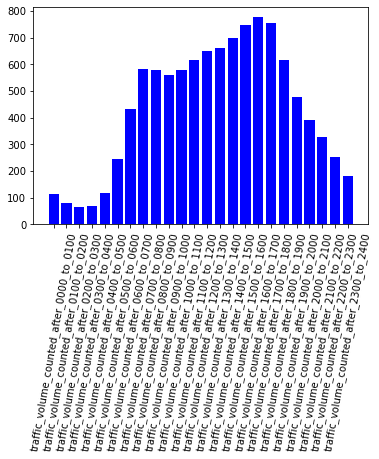

In [10]:
#average traffic vol over time
plt.bar(traffic_vol.columns, traffic_vol.mean(), color="blue")
plt.xticks(rotation=80)
plt.show()

Overall, traffic volume is busiest between 1200 to 1600 hours

## Station of Interest: Washington

According to Business Insider, in the year of 2015, Washington(FIPS = 53) has the worst traffic, worse than the city that doesn't sleep, New York City! Let us narrow down our scope to take a look at how busy Washington is

(Reference: https://www.businessinsider.com/cities-with-the-worst-traffic-in-2015-2015-12)





In [11]:
station_data = traffic_2015_stations[traffic_2015_stations['fips_county_code'] == 53]
station_data

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,...,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
25,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,1,North,53,...,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000621,I 15 0.43 mile S of Washingt,L,Inductance loop,15,0,6
263,G,Axle spacing with Scheme F modified,NaN,NaN,0,3,00000016,7,West,53,...,Station used for Heavy Vehicle Travel Informat...,L,NaN,R107WA,W/O UNION AVE I/C,L,Inductance loop,15,0,9
392,K,Axle spacing and weight algorithm,T,Test trucks only,13,0,NaN,5,South,53,...,Station used for Heavy Vehicle Travel Informat...,L,NaN,000915,JCT NM 525 TO STALLION SITE CA,Q,Quartz piezoelectric - NEW,15,0,5
584,G,Axle spacing with Scheme F modified,C,Combination of test trucks and trucks from the...,15,2,101,1,North,53,...,Station used for Heavy Vehicle Travel Informat...,N,NaN,057410,N/O TEAGUE AVE MON10147.964,B,Bending plate,15,0,97
594,F,Axle spacing with Scheme F,NaN,NaN,15,3,00000055,1,North,53,...,Station used for Heavy Vehicle Travel Informat...,P,0000,080283,SR-55/US-190.75 MI N OF SR-50,L,Inductance loop,15,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28302,D,Vehicle length classification,NaN,NaN,0,0,NaN,1,North,53,...,Station used for Heavy Vehicle Travel Informat...,NaN,NaN,000106,I 35 1.5 MI N OF IA 2 LEON,L,Inductance loop,15,0,70
28325,D,Vehicle length classification,NaN,NaN,0,0,NaN,5,South,53,...,Station used for Heavy Vehicle Travel Informat...,NaN,NaN,000106,I 35 1.5 MI N OF IA 2 LEON,L,Inductance loop,15,0,70
28367,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,00000005,1,North,53,...,Station used for Heavy Vehicle Travel Informat...,P,NaN,S837AA,S/O_SR_99_I/C,P,Piezoelectric,15,0,99
28375,NaN,NaN,NaN,NaN,13,0,NaN,1,North,53,...,Station not used for Heavy Vehicle Travel Info...,N,NaN,000067,SR-113 1.9 Mies South Of I6,W,Microwave,15,0,9


In [14]:
#get all station_id of interest
station_ids = list(station_data['station_id'].unique())

In [16]:
#get station's traffic vol data
stn_traffic = traffic_2015[traffic_2015['station_id'].isin(station_ids)]
stn_traffic

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
49,2015-12-01,1,3,5,South,49,3U,Urban: Principal Arterial - Other,1,12,...,429,392,397,272,165,186,134,56,25,15
80,2015-10-21,21,4,3,East,38,3R,Rural: Principal Arterial - Other,1,10,...,195,251,275,232,165,122,90,59,40,15
93,2015-01-10,10,7,8,Northwest,23,3U,Urban: Principal Arterial - Other,0,1,...,668,495,449,316,205,267,204,119,101,15
113,2015-01-09,9,6,5,South,49,1R,Rural: Principal Arterial - Interstate,2,1,...,335,381,344,269,174,139,100,79,53,15
119,2015-08-16,16,1,1,North,51,1U,Urban: Principal Arterial - Interstate,0,8,...,1997,1867,2121,1756,1366,1148,1068,705,430,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140288,2015-05-17,17,1,1,North,27,1U,Urban: Principal Arterial - Interstate,2,5,...,1261,1256,1053,840,622,446,355,201,88,15
7140307,2015-09-26,26,7,7,West,39,1U,Urban: Principal Arterial - Interstate,3,9,...,340,359,322,263,249,222,217,138,66,15
7140319,2015-11-10,10,3,1,North,16,1R,Rural: Principal Arterial - Interstate,2,11,...,15,20,15,9,12,5,6,4,2,15
7140321,2015-09-12,12,7,5,South,49,1R,Rural: Principal Arterial - Interstate,2,9,...,362,362,340,270,246,154,134,98,54,15


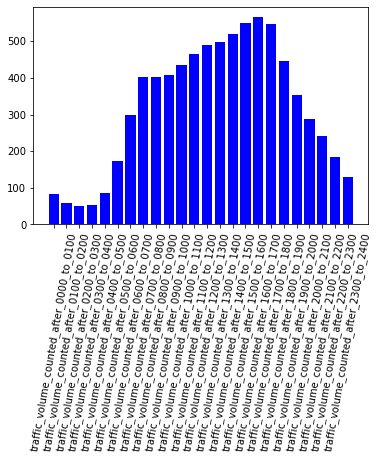

In [17]:
traffic_vol = stn_traffic.filter(regex='traffic_volume_counted_after')
#average traffic vol over time
plt.bar(traffic_vol.columns, traffic_vol.mean(), color="blue")
plt.xticks(rotation=80)
plt.show()

A similar trend could be observed for Washington's traffic volume throughout the day

In [4]:
# # #average traffic vol over day of week
# plt.bar(traffic_2015.groupby("day_of_week"), color="blue")
# plt.xticks(rotation=80)
# plt.show()
# traffic_2015.groupby("day_of_week").plot.bar()

In [18]:
traffic_2015.sort_values("date",inplace=True) #sort by date
traffic_2015.reset_index(inplace=True)

MemoryError: Unable to allocate 272. MiB for an array with shape (5, 7140391) and data type object

In [17]:
traffic_2015[traffic_2015['date'] == '2015-01-01']

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
6733156,2015-01-01,1,5,3,East,19,3U,Urban: Principal Arterial - Other,1,1,...,154,169,155,136,132,111,65,57,55,15
7035485,2015-01-01,1,5,7,West,40,3R,Rural: Principal Arterial - Other,1,1,...,184,174,157,120,71,56,55,36,34,15
2319032,2015-01-01,1,5,3,East,13,1U,Urban: Principal Arterial - Interstate,3,1,...,1063,1108,949,813,742,583,402,330,257,15
2013814,2015-01-01,1,5,9,North-South or Northeast-Southwest combined (A...,45,1R,Rural: Principal Arterial - Interstate,0,1,...,1698,1710,1603,1518,1205,896,709,499,332,15
3187119,2015-01-01,1,5,1,North,41,4R,Rural: Minor Arterial,0,1,...,135,125,101,138,97,66,63,53,26,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5053873,2015-01-01,1,5,5,South,44,1U,Urban: Principal Arterial - Interstate,1,1,...,748,627,542,399,293,175,130,101,63,15
4431434,2015-01-01,1,5,5,South,42,1U,Urban: Principal Arterial - Interstate,1,1,...,290,240,209,171,143,112,74,51,38,15
3310827,2015-01-01,1,5,5,South,32,4U,Urban: Minor Arterial,1,1,...,105,110,56,47,46,22,9,11,2,15
4156313,2015-01-01,1,5,1,North,12,4R,Rural: Minor Arterial,1,1,...,25,27,37,28,19,9,13,5,7,15


In [27]:
#mean of daily by stn
daily = stn_traffic.groupby(['station_id','date']).mean()
daily.filter(regex='traffic_volume_counted_after').transpose().sum()

station_id  date      
000004      2015-01-01     7458.347826
            2015-01-02    11620.862069
            2015-01-03    10326.034483
            2015-01-04     8131.000000
            2015-01-05     7700.480000
                              ...     
S837SA      2015-12-27    19370.750000
            2015-12-28    22505.250000
            2015-12-29    23884.250000
            2015-12-30    24032.500000
            2015-12-31    22458.125000
Length: 28604, dtype: float64

In [29]:
daily[daily['month_of_data'] == 1]

day_of_data  day_of_week  direction_of_travel  \
station_id date                                                        
000004     2015-01-01          1.0          5.0             4.130435   
           2015-01-02          2.0          6.0             4.310345   
           2015-01-03          3.0          7.0             4.310345   
           2015-01-04          4.0          1.0             4.272727   
           2015-01-05          5.0          2.0             4.680000   
...                            ...          ...                  ...   
S837SA     2015-01-27         27.0          3.0             5.000000   
           2015-01-28         28.0          4.0             5.000000   
           2015-01-29         29.0          5.0             5.000000   
           2015-01-30         30.0          6.0             5.000000   
           2015-01-31         31.0          7.0             5.000000   

                       fips_state_code  lane_of_travel  month_of_data  \
station_id date                                                         
000004     2015-01-01        29.608696        1.000000            1.0   
           2015-01-02        23.689655        1.206897            1.0   
           2015-01-03        23.689655        1.206897            1.0   
           2015-01-04        23.727273        1.242424            1.0   
           2015-01-05        22.440000        1.280000            1.0   
...                                ...             ...            ...   
S837SA     2015-01-27        53.000000        2.500000            1.0   
           2015-01-28        53.000000        2.500000            1.0   
           2015-01-29        53.000000        2.500000            1.0   
           2015-01-30        53.000000        2.500000            1.0   
           2015-01-31        53.000000        2.500000            1.0   

                       record_type  restrictions  \
station_id date                                    
000004     2015-01-01          3.0           NaN   
           2015-01-02          3.0           NaN   
           2015-01-03          3.0           NaN   
           2015-01-04          3.0           NaN   
           2015-01-05          3.0           NaN   
...                            ...           ...   
S837SA     2015-01-27          3.0           NaN   
           2015-01-28          3.0           NaN   
           2015-01-29          3.0           NaN   
           2015-01-30          3.0           NaN   
           2015-01-31          3.0           NaN   

                       traffic_volume_counted_after_0000_to_0100  \
station_id date                                                    
000004     2015-01-01                                 159.000000   
           2015-01-02                                  92.620690   
           2015-01-03                                 146.034483   
           2015-01-04                                 122.969697   
           2015-01-05                                  50.440000   
...                                                          ...   
S837SA     2015-01-27                                 258.000000   
           2015-01-28                                 261.500000   
           2015-01-29                                 279.500000   
           2015-01-30                                 328.750000   
           2015-01-31                                 435.250000   

                       traffic_volume_counted_after_0100_to_0200  ...  \
station_id date                                                   ...   
000004     2015-01-01                                 176.869565  ...   
           2015-01-02                                  67.586207  ...   
           2015-01-03                                 123.034483  ...   
           2015-01-04                                  96.030303  ...   
           2015-01-05                                  39.440000  ...   
...                                                          ..

In [38]:
daily[daily['month_of_data'] == 1].filter(regex='traffic_volume_counted_after').transpose().sum()

station_id  date      
000004      2015-01-01     7458.347826
            2015-01-02    11620.862069
            2015-01-03    10326.034483
            2015-01-04     8131.000000
            2015-01-05     7700.480000
                              ...     
S837SA      2015-01-27    22797.750000
            2015-01-28    22977.750000
            2015-01-29    23596.000000
            2015-01-30    24842.500000
            2015-01-31    21990.750000
Length: 2484, dtype: float64

In [39]:
for label, df in stn_traffic.groupby(['station_id','date']):
    print(label)
    print(df)

ValueError: too many values to unpack (expected 2)

In [22]:
daily

day_of_data  day_of_week  direction_of_travel  \
station_id date                                                        
000004     2015-01-01          1.0          5.0             4.130435   
           2015-01-02          2.0          6.0             4.310345   
           2015-01-03          3.0          7.0             4.310345   
           2015-01-04          4.0          1.0             4.272727   
           2015-01-05          5.0          2.0             4.680000   
...                            ...          ...                  ...   
S837SA     2015-12-27         27.0          1.0             5.000000   
           2015-12-28         28.0          2.0             5.000000   
           2015-12-29         29.0          3.0             5.000000   
           2015-12-30         30.0          4.0             5.000000   
           2015-12-31         31.0          5.0             5.000000   

                       fips_state_code  lane_of_travel  month_of_data  \
station_id date                                                         
000004     2015-01-01        29.608696        1.000000            1.0   
           2015-01-02        23.689655        1.206897            1.0   
           2015-01-03        23.689655        1.206897            1.0   
           2015-01-04        23.727273        1.242424            1.0   
           2015-01-05        22.440000        1.280000            1.0   
...                                ...             ...            ...   
S837SA     2015-12-27        53.000000        2.500000           12.0   
           2015-12-28        53.000000        2.500000           12.0   
           2015-12-29        53.000000        2.500000           12.0   
           2015-12-30        53.000000        2.500000           12.0   
           2015-12-31        53.000000        2.500000           12.0   

                       record_type  restrictions  \
station_id date                                    
000004     2015-01-01          3.0           NaN   
           2015-01-02          3.0           NaN   
           2015-01-03          3.0           NaN   
           2015-01-04          3.0           NaN   
           2015-01-05          3.0           NaN   
...                            ...           ...   
S837SA     2015-12-27          3.0           NaN   
           2015-12-28          3.0           NaN   
           2015-12-29          3.0           NaN   
           2015-12-30          3.0           NaN   
           2015-12-31          3.0           NaN   

                       traffic_volume_counted_after_0000_to_0100  \
station_id date                                                    
000004     2015-01-01                                 159.000000   
           2015-01-02                                  92.620690   
           2015-01-03                                 146.034483   
           2015-01-04                                 122.969697   
           2015-01-05                                  50.440000   
...                                                          ...   
S837SA     2015-12-27                                 356.250000   
           2015-12-28                                 299.625000   
           2015-12-29                                 332.125000   
           2015-12-30                                 330.750000   
           2015-12-31                                 388.500000   

                       traffic_volume_counted_after_0100_to_0200  ...  \
station_id date                                                   ...   
000004     2015-01-01                                 176.869565  ...   
           2015-01-02                                  67.586207  ...   
           2015-01-03                                 123.034483  ...   
           2015-01-04                                  96.030303  ...   
           2015-01-05                                  39.440000  ...   
...                                                          ..

In [15]:
traffic_2015[:10]['date']

6733156    2015-01-01
7035485    2015-01-01
2319032    2015-01-01
2013814    2015-01-01
3187119    2015-01-01
3187081    2015-01-01
495298     2015-01-01
3576760    2015-01-01
6672163    2015-01-01
2683784    2015-01-01
Name: date, dtype: object

In [ ]:
plt.plot(daily[:10],traffic_2015[:10])

<AxesSubplot:>

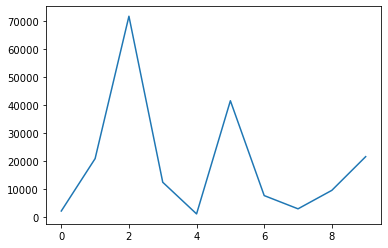

In [7]:
daily[:10].plot()

<AxesSubplot:xlabel='day_of_week'>

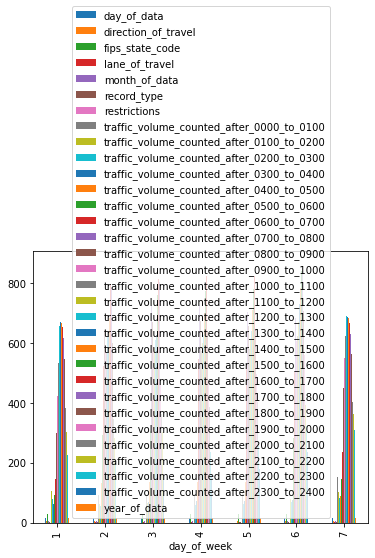

In [4]:
dfg = traffic_2015.groupby("day_of_week").mean()

dfg.plot(kind='bar', figsize=(6, 5))

In [ ]:
#traffic vol by month

In [ ]:
#rural vs urban